<a href="https://colab.research.google.com/github/qiakzm/machine-learning/blob/main/boston_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'sample_data']

In [ ]:
from google.colab import files
files.upload()

Saving Boston.csv to Boston.csv


{'Boston.csv': b'"","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"\n"1",0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n"2",0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n"3",0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n"4",0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n"5",0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n"6",0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n"7",0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n"8",0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n"9",0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n"10",0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n"11",0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n"12",0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,3

In [ ]:
os.listdir()

['.config', 'Boston.csv', 'sample_data']

In [ ]:
boston=pd.read_csv("Boston.csv")

In [ ]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston.drop(['medv'], axis=1)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
target = boston[['medv']]
crim = boston[['crim']]
age = boston[['age']]
tax = boston[['tax']]

In [ ]:
crim1 = sm.add_constant(crim, has_constant="add")

In [ ]:
crim1

,const,crim
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [ ]:
model1 = sm.OLS(target, crim1)
fitted_model1=model1.fit()

In [ ]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.17e-19
Time:                        12:45:18   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
crim          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fitted_model1.params

const    24.033106
crim     -0.415190
dtype: float64

In [ ]:
np.dot(crim1, fitted_model1.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [ ]:
pred1 = fitted_model1.predict(crim1)

In [ ]:
pred1 = fitted_model1.predict(crim1)
pred1

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [ ]:
pred1 - np.dot(crim1, fitted_model1.params)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Length: 506, dtype: float64

In [ ]:
np.sum(fitted_model1.resid)

-3.524291969370097e-12

In [ ]:
age1 = sm.add_constant(age, has_constant = "add")
age1

,const,age
0,1.0,65.2
1,1.0,78.9
2,1.0,61.1
3,1.0,45.8
4,1.0,54.2
...,...,...
501,1.0,69.1
502,1.0,76.7
503,1.0,91.0
504,1.0,89.3


In [ ]:
tax1 = sm.add_constant(tax, has_constant = "add")
tax1 

,const,tax
0,1.0,296
1,1.0,242
2,1.0,242
3,1.0,222
4,1.0,222
...,...,...
501,1.0,273
502,1.0,273
503,1.0,273
504,1.0,273


In [ ]:
model2 = sm.OLS(target, age1)
fitted_model2=model2.fit()

In [ ]:
model3 = sm.OLS(target, tax1)
fitted_model3=model3.fit()


In [ ]:
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.57e-18
Time:                        12:49:55   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999     31.006      0.000      29.016      32.942
age           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2 = fitted_model2.predict()
pred2 - np.dot(age1, fitted_model2.params)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
fitted_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.64e-29
Time:                        12:50:42   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.9707      0.948     34.768      0.000      31.108      34.834
tax           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred3 = fitted_model3.predict()
pred3 - np.dot(tax1, fitted_model3.params)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
x_data = boston[['crim', 'lstat', 'rm']]
x_data.head()

,crim,lstat,rm
0,0.00632,4.98,6.575
1,0.02731,9.14,6.421
2,0.02729,4.03,7.185
3,0.03237,2.94,6.998
4,0.06905,5.33,7.147


In [ ]:
x_data1 = sm.add_constant(x_data, has_constant="add")

In [ ]:
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.01e-112
Time:                        12:52:53   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
crim          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
lstat         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
rm             5.2170      0.442     11.802      0.000       4.348       6.085
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(fitted_model1.params)
print(fitted_model2.params)
print(fitted_model3.params)

const    24.033106
crim     -0.415190
dtype: float64
const    30.978678
age      -0.123163
dtype: float64
const    32.970654
tax      -0.025568
dtype: float64


In [ ]:
print(fitted_multi_model.params)

const   -2.562251
crim    -0.102941
lstat   -0.578486
rm       5.216955
dtype: float64


In [ ]:
np.dot(x_data1.T, x_data1)

array([[   506.        ,   1828.44292   ,   6402.45      ,
          3180.025     ],
       [  1828.44292   ,  43970.34355515,  37268.4186782 ,
         10821.95113617],
       [  6402.45      ,  37268.4186782 , 106762.9583    ,
         38681.78802   ],
       [  3180.025     ,  10821.95113617,  38681.78802   ,
         20234.598247  ]])

In [ ]:
from scipy import linalg

In [ ]:
linalg.inv(np.dot(x_data1.T, x_data1))

array([[ 3.32623922e-01,  3.97977840e-04, -3.47807838e-03,
        -4.58383696e-02],
       [ 3.97977840e-04,  3.40273534e-05, -2.11132107e-05,
        -4.03825708e-05],
       [-3.47807838e-03, -2.11132107e-05,  7.54060302e-05,
         4.13747886e-04],
       [-4.58383696e-02, -4.03825708e-05,  4.13747886e-04,
         6.48392767e-03]])

In [ ]:
np.dot(linalg.inv(np.dot(x_data1.T, x_data1)), x_data1.T)

array([[ 1.39183266e-02,  6.51698301e-03, -1.07305588e-02, ...,
        -6.73672542e-03, -1.29629474e-03,  2.88301636e-02],
       [ 2.75337005e-05, -5.33641058e-05,  2.36714361e-05, ...,
        -7.41980284e-07, -9.46589369e-06, -1.02879254e-05],
       [-3.82297432e-04, -1.32768687e-04, -2.01989694e-04, ...,
        -1.67765953e-04, -1.80757960e-04, -3.89980084e-04],
       [-1.14633592e-03, -4.24517199e-04,  2.41495265e-03, ...,
         1.72459426e-03,  8.90095766e-04, -3.48186694e-03]])

In [ ]:
np.dot(np.dot(linalg.inv(np.dot(x_data1.T, x_data1)), x_data1.T), target)

array([[-2.56225101],
       [-0.10294089],
       [-0.57848582],
       [ 5.21695492]])

In [ ]:
print(fitted_multi_model.params)

const   -2.562251
crim    -0.102941
lstat   -0.578486
rm       5.216955
dtype: float64


In [ ]:
import matplotlib.pyplot as plt

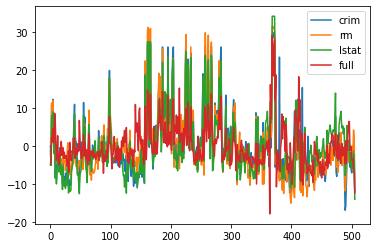

In [ ]:
fitted_model1.resid.plot(label="crim")
fitted_model2.resid.plot(label="rm")
fitted_model3.resid.plot(label="lstat")
fitted_multi_model.resid.plot(label="full")
plt.legend()

In [ ]:
x_data2 = boston[['crim', 'rm', 'lstat', 'black', 'tax', 'age', 'zn', 'nox', 'indus']]
x_data2.head()

,crim,rm,lstat,black,tax,age,zn,nox,indus
0,0.00632,6.575,4.98,396.90,296,65.2,18.0,0.538,2.31
1,0.02731,6.421,9.14,396.90,242,78.9,0.0,0.469,7.07
2,0.02729,7.185,4.03,392.83,242,61.1,0.0,0.469,7.07
3,0.03237,6.998,2.94,394.63,222,45.8,0.0,0.458,2.18
4,0.06905,7.147,5.33,396.90,222,54.2,0.0,0.458,2.18


In [ ]:
x_data2_ = sm.add_constant(x_data2, has_constant='add')

In [ ]:
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

In [ ]:
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          5.76e-111
Time:                        13:03:46   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
crim          -0.0453      0.036     -1.269      0.205      -0.115       0.025
rm             5.0922      0.458     11.109      0.000       4.192       5.993
lstat         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
black          0.0090      0.003      2.952      0.003       0.003       0.015
tax           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
age            0.0236      0.014      1.653      0.099      -0.004       0.052
zn             0.0294      0.013      2.198      0.028       0.003       0.056
nox            3.4838      3.833      0.909      0.364      -4.047      11.014
indus          0.0293      0.065      0.449      0.654      -0.099       0.157
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fitted_multi_model.params

const   -2.562251
crim    -0.102941
lstat   -0.578486
rm       5.216955
dtype: float64

In [ ]:
fitted_multi_model2.params

const   -7.108827
crim    -0.045293
rm       5.092238
lstat   -0.565133
black    0.008974
tax     -0.006025
age      0.023619
zn       0.029377
nox      3.483832
indus    0.029270
dtype: float64

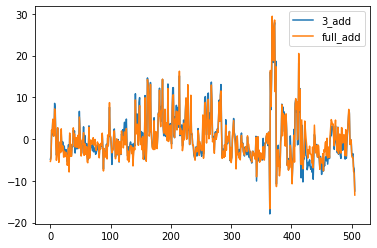

In [ ]:
fitted_multi_model.resid.plot(label = "3_add")
fitted_multi_model2.resid.plot(label = "full_add")
plt.legend()

In [ ]:
x_data2.corr()

,crim,rm,lstat,black,tax,age,zn,nox,indus
crim,1.000000,-0.219247,0.455621,-0.385064,0.582764,0.352734,-0.200469,0.420972,0.406583
rm,-0.219247,1.000000,-0.613808,0.128069,-0.292048,-0.240265,0.311991,-0.302188,-0.391676
lstat,0.455621,-0.613808,1.000000,-0.366087,0.543993,0.602339,-0.412995,0.590879,0.603800
black,-0.385064,0.128069,-0.366087,1.000000,-0.441808,-0.273534,0.175520,-0.380051,-0.356977
tax,0.582764,-0.292048,0.543993,-0.441808,1.000000,0.506456,-0.314563,0.668023,0.720760
age,0.352734,-0.240265,0.602339,-0.273534,0.506456,1.000000,-0.569537,0.731470,0.644779
zn,-0.200469,0.311991,-0.412995,0.175520,-0.314563,-0.569537,1.000000,-0.516604,-0.533828
nox,0.420972,-0.302188,0.590879,-0.380051,0.668023,0.731470,-0.516604,1.000000,0.763651
indus,0.406583,-0.391676,0.603800,-0.356977,0.720760,0.644779,-0.533828,0.763651,1.000000


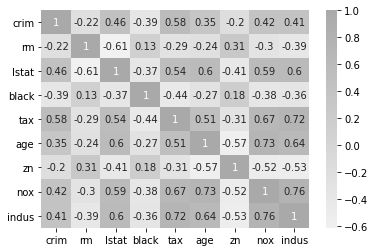

In [ ]:
import seaborn as sns;
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data2.corr(), annot = True, cmap = cmap)
plt.show()

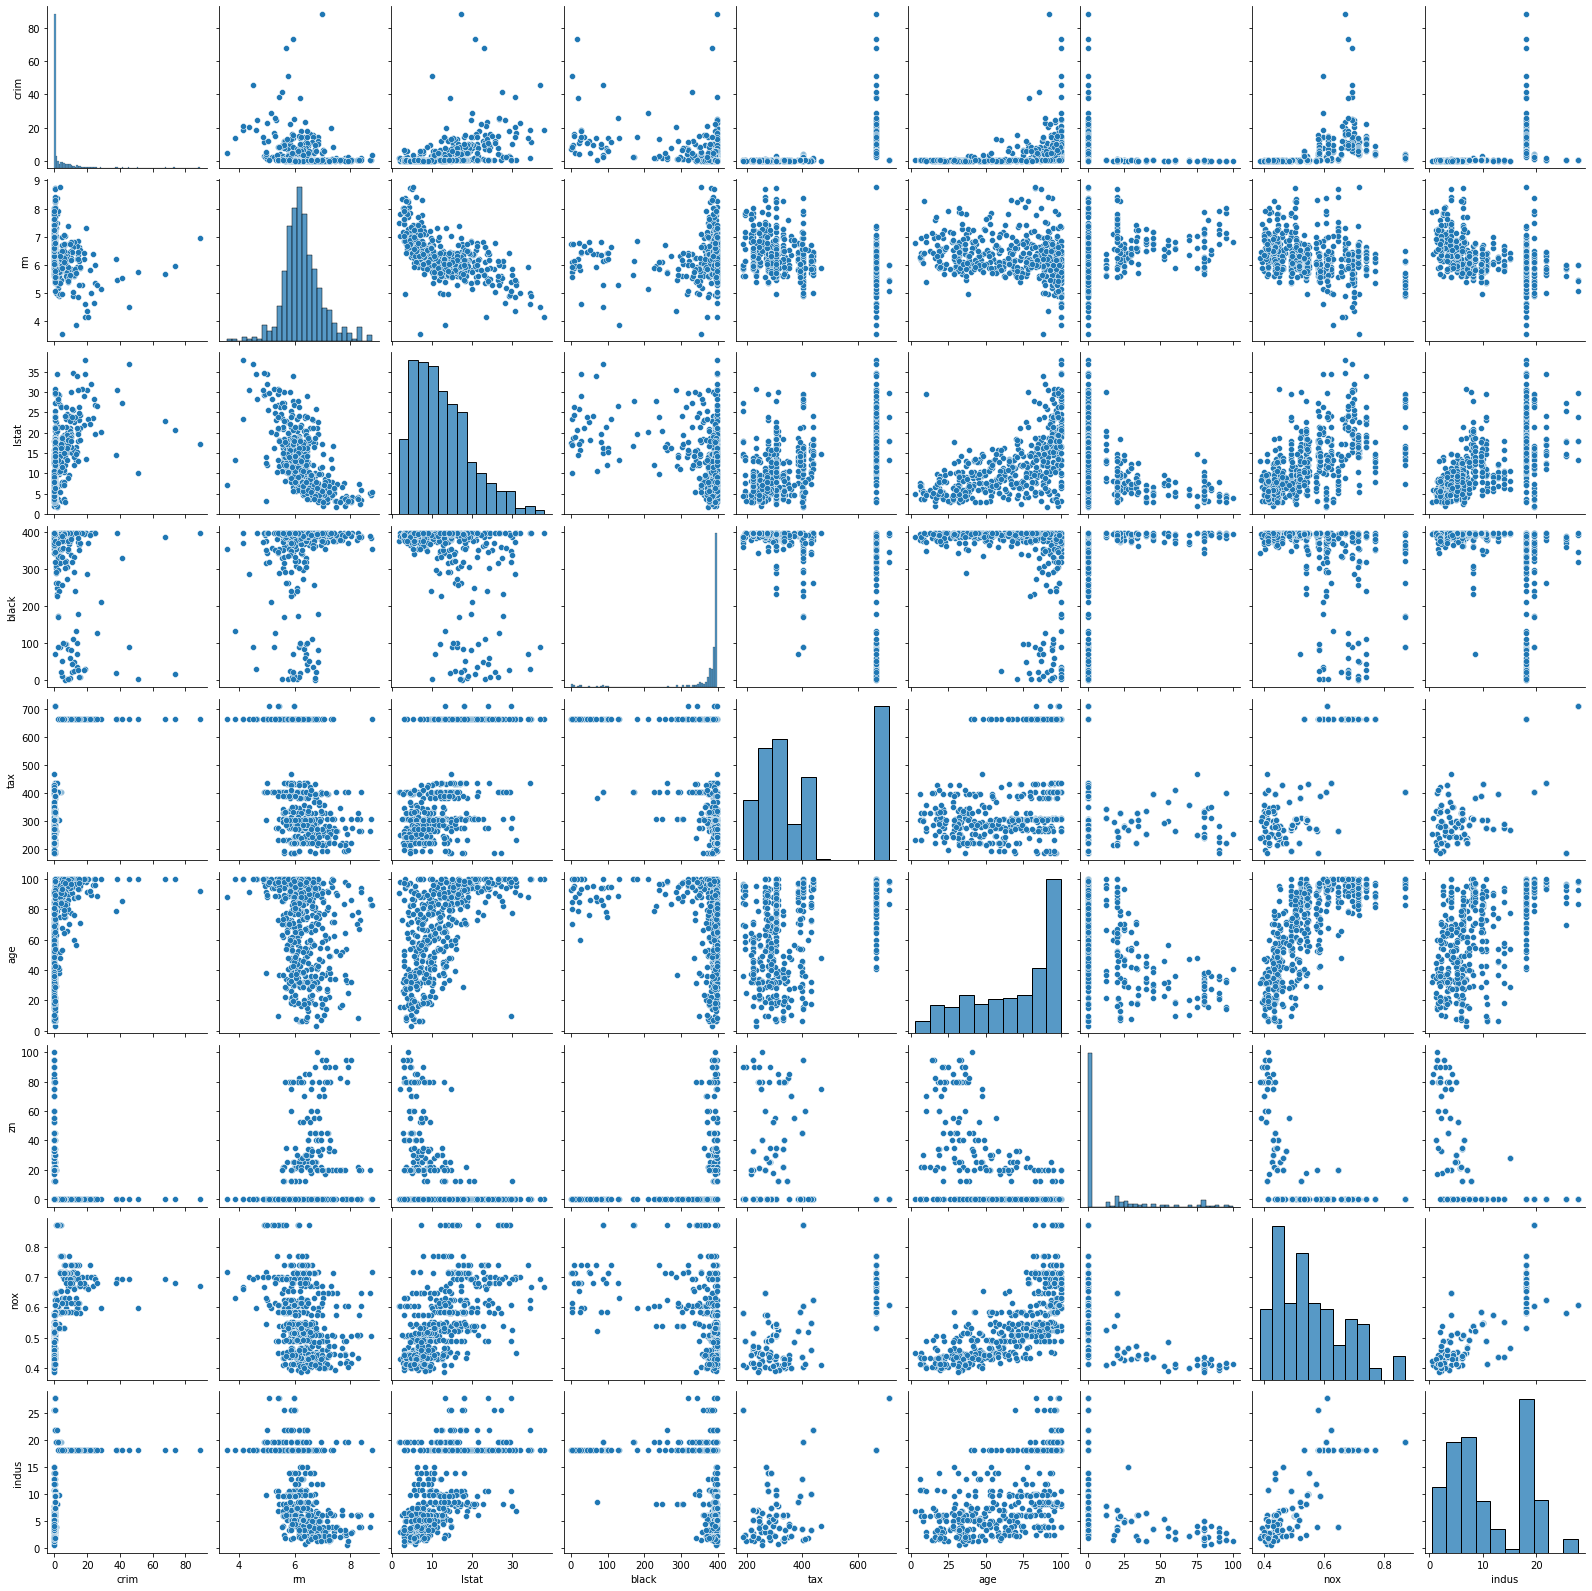

In [ ]:
sns.pairplot(x_data2)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data2.values, i) for i in range(x_data2.shape[1])]
vif["featured"] = x_data2.columns
vif

,VIF Factor,featured
0,1.917332,crim
1,46.535369,rm
2,8.844137,lstat
3,16.856737,black
4,19.923044,tax
5,18.457503,age
6,2.086502,zn
7,72.439753,nox
8,12.642137,indus


In [ ]:
vif = pd.DataFrame()
x_data3 = x_data2.drop('nox', axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data3.values, i) for i in range(x_data3.shape[1])]
vif["featured"] = x_data3.columns
vif

,VIF Factor,featured
0,1.916648,crim
1,30.806301,rm
2,8.171214,lstat
3,16.735751,black
4,18.727105,tax
5,16.339792,age
6,2.074500,zn
7,11.217461,indus


In [ ]:
vif = pd.DataFrame()
x_data4 = x_data3.drop('rm', axis=1)
vif["VIF Factor"] = [variance_inflation_factor(
    x_data4.values, i) for i in range(x_data4.shape[1])]
vif["featured"] = x_data4.columns
vif

,VIF Factor,featured
0,1.907517,crim
1,7.933529,lstat
2,7.442569,black
3,16.233237,tax
4,13.765377,age
5,1.820070,zn
6,11.116823,indus


In [ ]:
multi_model3 = sm.OLS(target, x_data3)
fitted_multi_model3 = multi_model3.fit()

In [ ]:
fitted_multi_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1222.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                   1.14e-321
Time:                        13:12:00   Log-Likelihood:                         -1567.3
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3184.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0410      0.036     -1.149      0.251      -0.111       0.029
rm             4.4331      0.211     21.037      0.000       4.019       4.847
lstat         -0.6163      0.047    -13.044      0.000      -0.709      -0.523
black          0.0064      0.003      2.381      0.018       0.001       0.012
tax           -0.0062      0.002     -2.625      0.009      -0.011      -0.002
age            0.0312      0.013      2.383      0.018       0.005       0.057
zn             0.0282      0.013      2.115      0.035       0.002       0.054
indus          0.0395      0.061      0.643      0.521      -0.081       0.160
==============================================================================
Omnibus:                      187.459   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              733.320
Skew:                           1.663   Prob(JB):                    5.77e-160
Kurtosis:                       7.870   Cond. No.                         492.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
multi_model4 = sm.OLS(target, x_data4)
fitted_multi_model4 = multi_model4.fit()

In [ ]:
fitted_multi_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              707.3
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                   2.09e-254
Time:                        13:12:47   Log-Likelihood:                         -1728.2
No. Observations:                 506   AIC:                                      3470.
Df Residuals:                     499   BIC:                                      3500.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0928      0.049     -1.899      0.058      -0.189       0.003
lstat         -0.7858      0.064    -12.294      0.000      -0.911      -0.660
black          0.0482      0.002     19.723      0.000       0.043       0.053
tax            0.0119      0.003      3.953      0.000       0.006       0.018
age            0.1405      0.017      8.517      0.000       0.108       0.173
zn             0.1265      0.017      7.374      0.000       0.093       0.160
indus         -0.0830      0.084     -0.988      0.324      -0.248       0.082
==============================================================================
Omnibus:                       43.250   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.449
Skew:                           0.731   Prob(JB):                     4.08e-12
Kurtosis:                       3.594   Cond. No.                         146.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import train_test_split
x = x_data2_
y = target
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [ ]:
fit_1 = sm.OLS(train_y, train_x)
fit_1_ = fit_1.fit()

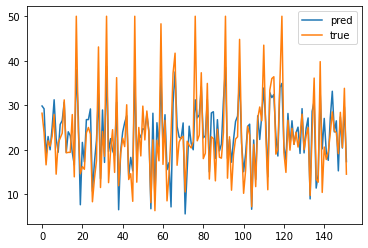

In [ ]:
plt.plot(np.array(fit_1_.predict(test_x)), label="pred")
plt.plot(np.array(test_y), label="true")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error